<a href="https://colab.research.google.com/github/leonarde69/DAP__/blob/main/%EC%9E%90%EB%B9%84%EC%8A%A4(%EA%B6%8C%EC%88%98%EC%A7%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트(3)

## 먼저 필요한 라이브러리들을 import 하고 환경을 만듭니다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [4]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

In [6]:
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# 3.대중교통 데이터 시각화하기

## 3-0.데이터파일 준비

In [8]:
file_path = "2022년 01월  교통카드 통계자료.csv"
# file_path = "/content/2022년 01월 지하철역별 유무임승하자 통계자료.csv
df = pd.read_csv(file_path, encoding = "utf-8")

### 파일을 열고 데이터를 살펴봅니다: read_csv(), head(), info(), describe()

- 인코딩 방식에 유의합니다 (CP949, utf-8)

In [9]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2022-01,1호선,1,서울역,934323,903182,150793,141975
1,2022-01,1호선,10,동묘앞,108544,116417,134454,134685
2,2022-01,1호선,2,시청,446227,447648,59407,58103
3,2022-01,1호선,3,종각,721738,694000,106481,99362
4,2022-01,1호선,4,종로3가,404565,367191,245984,228863


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     610 non-null    object
 1   호선명     610 non-null    object
 2   역ID     610 non-null    int64 
 3   지하철역    610 non-null    object
 4   유임승차    610 non-null    int64 
 5   유임하차    610 non-null    int64 
 6   무임승차    610 non-null    int64 
 7   무임하차    610 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 38.2+ KB


In [11]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차
count,610.000000,6.100000e+02,6.100000e+02,610.000000,610.000000
mean,316.370492,2.297607e+05,2.292586e+05,45324.588525,44856.214754
std,191.605773,2.403294e+05,2.425954e+05,39048.923506,38893.262478
min,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,153.250000,7.318625e+04,6.916300e+04,17932.750000,18016.750000
50%,309.500000,1.627995e+05,1.601020e+05,35792.500000,35101.000000
75%,461.750000,3.032512e+05,3.054182e+05,59415.250000,58250.000000
max,725.000000,2.058133e+06,2.012852e+06,265993.000000,286175.000000


## 3-1.유임승차비율이 가장 높은 곳

#### 유임승차자가 가장 많은 곳을 출력해보자

예) 유임승차자가 가장 많은 곳: 강남에서 2,058,133명

In [16]:
idx = df['유임승차'].idxmax()   #argmax()
station = df.loc[idx]['지하철역']
num = df.loc[idx]['유임승차']
print(f"유임승차자가 가장 많은 곳: {station}에서 {num}명")

유임승차자가 가장 많은 곳: 강남에서 2058133명


유임승차자가 가장 많은 곳: 강남에서 2,058,133명


유임승차자가 가장 많은 곳: 강남에서 2,058,133명


유임승차자가 가장 많은 곳: 강남에서 2,058,133명


#### 유임하차자가 가장 많은 곳을 출력해보자

예) 유임하차자가 가장 많은 곳: 강남에서 2,012,852명

In [17]:
idx = df['유임하차'].idxmax()   #argmax()
station = df.loc[idx]['지하철역']
num = df.loc[idx]['유임하차']
print(f"유임승하자가 가장 많은 곳: {station}에서 {num}명")

유임승하자가 가장 많은 곳: 강남에서 2012852명


#### 무임승차자가 가장 많은 곳을 출력해보자

예) 무임승차자가 가장 많은 곳: 제기동에서 265,993명

In [18]:
idx = df['무임승차'].idxmax()   #argmax()
station = df.loc[idx]['지하철역']
num = df.loc[idx]['무임승차']
print(f"무임승차자가 가장 많은 곳: {station}에서 {num}명")

무임승하자가 가장 많은 곳: 제기동에서 265993명


#### 무임하차자가 가장 많은 곳을 출력해보자

예) 무하하차자가 가장 많은 곳: 제기동에서 286,175명

In [19]:
idx = df['무임하차'].idxmax()   #argmax()
station = df.loc[idx]['지하철역']
num = df.loc[idx]['무임하차']
print(f"무임승하자가 가장 많은 곳: {station}에서 {num}명")

무임승하자가 가장 많은 곳: 제기동에서 286175명


#### 무임하차자가 제일 많은 곳의 **인덱스 번호를 찾아서 무임하차자가 제일 많은 곳을 출력해 본다

무임하차자가 가장 많은 곳: 제기동에서 286,175명


#### 유임승차 비율이 가장 많은 곳은?
- 주의! 무임승차인원이 0인 곳이 있으므로 유임승차인원/무임승차인원을 하면 안 된다

In [21]:
df['유임승차비율'] = df['유임승차']/(df['무임승차']+df['유임승차'])
print(df['유임승차비율'])

0      0.861035
1      0.446687
2      0.882510
3      0.871434
4      0.621882
         ...   
605    0.771133
606    0.680925
607    0.722358
608    0.672243
609    0.572294
Name: 유임승차비율, Length: 610, dtype: float64


In [22]:
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,2022-01,1호선,1,서울역,934323,903182,150793,141975,0.861035
1,2022-01,1호선,10,동묘앞,108544,116417,134454,134685,0.446687
2,2022-01,1호선,2,시청,446227,447648,59407,58103,0.882510
3,2022-01,1호선,3,종각,721738,694000,106481,99362,0.871434
4,2022-01,1호선,4,종로3가,404565,367191,245984,228863,0.621882
...,...,...,...,...,...,...,...,...,...
605,2022-01,우이신설선,721,북한산보국문,119588,111391,35493,35903,0.771133
606,2022-01,우이신설선,722,정릉,80992,72596,37952,35587,0.680925
607,2022-01,우이신설선,723,성신여대입구(돈암),63626,73601,24455,23411,0.722358
608,2022-01,우이신설선,724,보문,26403,26163,12873,12530,0.672243


In [26]:
idx = df['유임승차비율'].idxmax()
station = df.loc[idx]['지하철역']
print(f'유임승차비율이 가장 높은 곳:{station}')

유임승차비율이 가장 높은 곳:충무로


In [27]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차,유임승차비율
count,610.000000,6.100000e+02,6.100000e+02,610.000000,610.000000,610.000000
mean,316.370492,2.297607e+05,2.292586e+05,45324.588525,44856.214754,0.809223
std,191.605773,2.403294e+05,2.425954e+05,39048.923506,38893.262478,0.089729
min,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.377319
25%,153.250000,7.318625e+04,6.916300e+04,17932.750000,18016.750000,0.770355
50%,309.500000,1.627995e+05,1.601020e+05,35792.500000,35101.000000,0.820494
75%,461.750000,3.032512e+05,3.054182e+05,59415.250000,58250.000000,0.867527
max,725.000000,2.058133e+06,2.012852e+06,265993.000000,286175.000000,1.000000


#### 무임승차인원이 0인 곳을 처리해 보자

(1) 무임승차인원이 있는 곳은 **유임승차인원/무임승차인원**, 없는 곳은 그냥 **유임승차인원**만

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-01,1호선,1,서울역,934323,903182,150793,141975,2022-02-03 08:50:02
1,2022-01,1호선,10,동묘앞,108544,116417,134454,134685,2022-02-03 08:50:02
2,2022-01,1호선,2,시청,446227,447648,59407,58103,2022-02-03 08:50:02
3,2022-01,1호선,3,종각,721738,694000,106481,99362,2022-02-03 08:50:02
4,2022-01,1호선,4,종로3가,404565,367191,245984,228863,2022-02-03 08:50:02
...,...,...,...,...,...,...,...,...,...
605,2022-01,우이신설선,721,북한산보국문,119588,111391,35493,35903,2022-02-03 08:50:02
606,2022-01,우이신설선,722,정릉,80992,72596,37952,35587,2022-02-03 08:50:02
607,2022-01,우이신설선,723,성신여대입구(돈암),63626,73601,24455,23411,2022-02-03 08:50:02
608,2022-01,우이신설선,724,보문,26403,26163,12873,12530,2022-02-03 08:50:02


유임승차비율이 가장 높은 곳: 연신내


In [ ]:
df.describe()

,역ID,유임승차,유임하차,무임승차,무임하차,유임승차비율
count,610.000000,6.100000e+02,6.100000e+02,610.000000,610.000000,610.000000
mean,316.370492,2.297607e+05,2.292586e+05,45324.588525,44856.214754,5.328426
std,191.605773,2.403294e+05,2.425954e+05,39048.923506,38893.262478,3.244522
min,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.610000
25%,153.250000,7.318625e+04,6.916300e+04,17932.750000,18016.750000,3.325000
50%,309.500000,1.627995e+05,1.601020e+05,35792.500000,35101.000000,4.550000
75%,461.750000,3.032512e+05,3.054182e+05,59415.250000,58250.000000,6.390000
max,725.000000,2.058133e+06,2.012852e+06,265993.000000,286175.000000,22.000000


441    연신내
Name: 지하철역, dtype: object

(2) 유임승차비율을 일괄적으로 **유임승차인원/(유임+무임 승차인원)**으로 업데이트

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-01,1호선,1,서울역,934323,903182,150793,141975,2022-02-03 08:50:02,0.861035
1,2022-01,1호선,10,동묘앞,108544,116417,134454,134685,2022-02-03 08:50:02,0.446687
2,2022-01,1호선,2,시청,446227,447648,59407,58103,2022-02-03 08:50:02,0.882510
3,2022-01,1호선,3,종각,721738,694000,106481,99362,2022-02-03 08:50:02,0.871434
4,2022-01,1호선,4,종로3가,404565,367191,245984,228863,2022-02-03 08:50:02,0.621882
...,...,...,...,...,...,...,...,...,...,...
605,2022-01,우이신설선,721,북한산보국문,119588,111391,35493,35903,2022-02-03 08:50:02,0.771133
606,2022-01,우이신설선,722,정릉,80992,72596,37952,35587,2022-02-03 08:50:02,0.680925
607,2022-01,우이신설선,723,성신여대입구(돈암),63626,73601,24455,23411,2022-02-03 08:50:02,0.722358
608,2022-01,우이신설선,724,보문,26403,26163,12873,12530,2022-02-03 08:50:02,0.672243


,역ID,유임승차,유임하차,무임승차,무임하차,유임승차비율
count,610.000000,6.100000e+02,6.100000e+02,610.000000,610.000000,610.000000
mean,316.370492,2.297607e+05,2.292586e+05,45324.588525,44856.214754,0.809223
std,191.605773,2.403294e+05,2.425954e+05,39048.923506,38893.262478,0.089729
min,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.377319
25%,153.250000,7.318625e+04,6.916300e+04,17932.750000,18016.750000,0.770355
50%,309.500000,1.627995e+05,1.601020e+05,35792.500000,35101.000000,0.820494
75%,461.750000,3.032512e+05,3.054182e+05,59415.250000,58250.000000,0.867527
max,725.000000,2.058133e+06,2.012852e+06,265993.000000,286175.000000,1.000000


72         충무로
192         창동
237         복정
266         지축
330       김포공항
331         계양
332         검암
441        연신내
475         신내
519    부천종합운동장
523         상동
524      삼산체육관
Name: 지하철역, dtype: object

유임승차비율이 가장 높은 곳: 충무로에서 1.0명


#### 유임+무임 승차인원이 50만명 이상인 곳 중에서 유임승차비율이 0.94 이상인 곳

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
48,2022-01,2호선,49,홍대입구,1478926,1509702,78305,74824,2022-02-03 08:50:02,0.949715
559,2022-01,9호선,632,여의도,619844,585023,38045,34758,2022-02-03 08:50:02,0.942171


## 3-2.무임승차비율이 가장 높은 곳

In [34]:
df['무임승차비율'] = 1-df['유임승차비율']

In [40]:
idx = df['유임승차비율'].idxmin()   #argmax()
station = df.loc[idx]['지하철역']
prop =1-df['유임승차비율'].min()
print(f'무임승차는 {station}에서 {prop:.2f}로 비율이 가장 높습니다.')


무임승차는 소요산에서 0.62로 비율이 가장 높습니다.


In [39]:
idx = df['유임승차비율'].idxmin()   #argmax()
station = df.loc[idx]['지하철역']
prop =1-df['유임승차비율'].min()
print(f'무임승차는 {station}에서 {prop*100:.1f}%로 비율이 가장 높습니다.')



무임승차는 소요산에서 62.3%로 비율이 가장 높습니다.


In [35]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,무임승차비율
0,2022-01,1호선,1,서울역,934323,903182,150793,141975,0.861035,0.138965
1,2022-01,1호선,10,동묘앞,108544,116417,134454,134685,0.446687,0.553313
2,2022-01,1호선,2,시청,446227,447648,59407,58103,0.882510,0.117490
3,2022-01,1호선,3,종각,721738,694000,106481,99362,0.871434,0.128566
4,2022-01,1호선,4,종로3가,404565,367191,245984,228863,0.621882,0.378118


## 3-3.모든 역의 유무임 승하차 비율

,지하철역,유임승차비율,유임하차비율,무임승차비율,무임하차비율
0,서울역,0.861035,0.864159,0.138965,0.135841
1,동묘앞,0.446687,0.463624,0.553313,0.536376
2,시청,0.882510,0.885115,0.117490,0.114885
3,종각,0.871434,0.874758,0.128566,0.125242
4,종로3가,0.621882,0.616036,0.378118,0.383964
...,...,...,...,...,...
605,북한산보국문,0.771133,0.756249,0.228867,0.243751
606,정릉,0.680925,0.671048,0.319075,0.328952
607,성신여대입구(돈암),0.722358,0.758679,0.277642,0.241321
608,보문,0.672243,0.676169,0.327757,0.323831


**더 좋은 방법은 없을까?**
- '유임승차비율', '유임하차비율', '무임승차비율', '무임하차비율'의 최대값이 위치한 인덱스를 리스트 생성해서 idx에 할당한다 

[72, 120, 208, 208]

### 모든 역의 유무임 승하차 비율을 출력해 보자

충무로에서 유임승차 19명, 유임승차비율은 100.0%
서울역에서 유임하차 54,080명, 유임하차비율은 96.4%
소요산에서 무임승차 43,125명, 무임승차비율은 62.3%
소요산에서 무임하차 39,419명, 무임하차비율은 65.2%


#### 모든 역의 유무임 승하차 비율을 파이플롯으로 나타내 보자

사용월                   2022-01
호선명                       경원선
역ID                       374
지하철역                      소요산
유임승차                    26132
유임하차                    21000
무임승차                    43125
무임하차                    39419
작업일시      2022-02-03 08:50:02
유임승차비율               0.377319
무임승차비율               0.622681
유임하차비율               0.347573
무임하차비율               0.652427
Name: 208, dtype: object

유임승차    26132
유임하차    21000
무임승차    43125
무임하차    39419
Name: 208, dtype: object

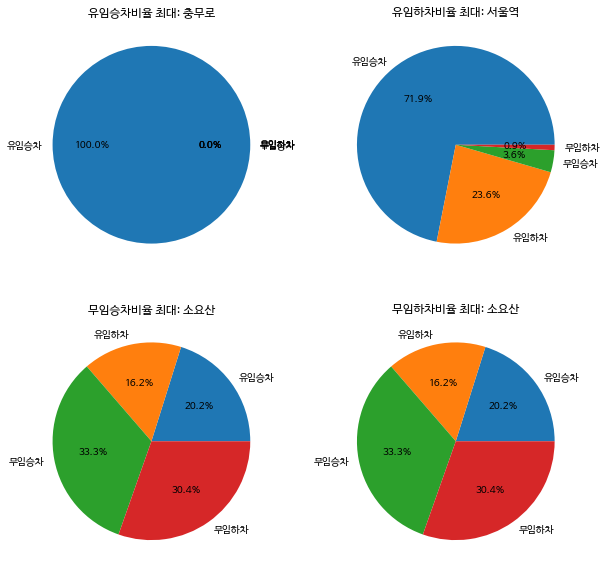

##  3-4.지하철 시간대별 데이터 시각화

In [ ]:
file_path_time = "/content/2022년 01월  교통카드 통계자료_시간대별.csv"

### (1) 파일을 열고 데이터를 살펴봅니다: read_csv(), head()
- 파일을 올리기 전에 '승차', '하차'가 써있는 두 번째 행은 삭제하고 csv 파일로 저장합니다
- 인코딩 방식에 유의합니다 (CP949, utf-8)


,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,11:00:00~11:59:59,Unnamed: 19,12:00:00~12:59:59,Unnamed: 21,13:00:00~13:59:59,Unnamed: 23,14:00:00~14:59:59,Unnamed: 25,15:00:00~15:59:59,Unnamed: 27,16:00:00~16:59:59,Unnamed: 29,17:00:00~17:59:59,Unnamed: 31,18:00:00~18:59:59,Unnamed: 33,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,44583,1호선,1,서울역,530,14,7194,5587,10201,34337,30952,78629,50863,172417,41295,111532,42007,57039,51630,49488,58151,55836,60888,55422,54039,50650,67182,54420,78035,53846,115584,64383,167281,68866,78941,45042,60773,31581,71463,34893,29558,14807,8521,5862,28,506,0,0,0,0,0,0,44595.36806
1,44583,1호선,10,동묘앞,111,1,2206,727,2815,3923,4877,6311,8215,14327,6954,14305,7511,17405,11602,23815,17481,28354,23659,30670,30219,30041,32926,23896,31917,15992,26078,10771,16570,8062,7140,5910,4923,4372,4308,5958,2616,3634,866,1774,4,854,0,0,0,0,0,0,44595.36806


### (2) 데이터 전처리

#### '사용월'과 '작업일시' 칼럼은 사용하지 않으므로 삭제합니다 : del ___, ___

,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,11:00:00~11:59:59,Unnamed: 19,12:00:00~12:59:59,Unnamed: 21,13:00:00~13:59:59,Unnamed: 23,14:00:00~14:59:59,Unnamed: 25,15:00:00~15:59:59,Unnamed: 27,16:00:00~16:59:59,Unnamed: 29,17:00:00~17:59:59,Unnamed: 31,18:00:00~18:59:59,Unnamed: 33,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,1호선,1,서울역,530,14,7194,5587,10201,34337,30952,78629,50863,172417,41295,111532,42007,57039,51630,49488,58151,55836,60888,55422,54039,50650,67182,54420,78035,53846,115584,64383,167281,68866,78941,45042,60773,31581,71463,34893,29558,14807,8521,5862,28,506,0,0,0,0,0,0
1,1호선,10,동묘앞,111,1,2206,727,2815,3923,4877,6311,8215,14327,6954,14305,7511,17405,11602,23815,17481,28354,23659,30670,30219,30041,32926,23896,31917,15992,26078,10771,16570,8062,7140,5910,4923,4372,4308,5958,2616,3634,866,1774,4,854,0,0,0,0,0,0
2,1호선,2,시청,27,0,1610,4157,2623,17377,5704,52313,7236,155471,7552,70487,8879,27920,13231,26945,14892,23890,18034,24121,23734,20685,30906,17381,36316,15454,66415,15695,122934,14755,44810,6560,40906,4190,45218,5342,12194,1997,2405,912,8,99,0,0,0,0,0,0
3,1호선,3,종각,87,2,1954,3686,2712,19130,4579,84536,8362,201196,9704,115947,13646,48750,21588,43603,26831,40419,33109,40951,41670,35919,52702,31185,59125,31984,106293,33183,169808,33595,72906,14096,79392,5874,97044,5648,22175,2401,4526,1133,6,124,0,0,0,0,0,0
4,1호선,4,종로3가,124,15,2110,2375,2416,10706,3664,20452,6359,64067,11039,63900,16447,54362,29901,54901,35384,56013,44806,58647,50507,51138,58999,41480,62960,34651,70171,29590,85369,27030,48596,10953,46301,5191,58233,6258,14178,2577,2951,1402,33,345,1,1,0,0,0,0


#### 데이터프레임의 정보를 봅니다 : info()
- 승하차 인원수가 정수인 것을 확인합니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   호선명                610 non-null    object
 1   역ID                610 non-null    int64 
 2   지하철역               610 non-null    object
 3   04:00:00~04:59:59  610 non-null    int64 
 4   Unnamed: 5         610 non-null    int64 
 5   05:00:00~05:59:59  610 non-null    int64 
 6   Unnamed: 7         610 non-null    int64 
 7   06:00:00~06:59:59  610 non-null    int64 
 8   Unnamed: 9         610 non-null    int64 
 9   07:00:00~07:59:59  610 non-null    int64 
 10  Unnamed: 11        610 non-null    int64 
 11  08:00:00~08:59:59  610 non-null    int64 
 12  Unnamed: 13        610 non-null    int64 
 13  09:00:00~09:59:59  610 non-null    int64 
 14  Unnamed: 15        610 non-null    int64 
 15  10:00:00~10:59:59  610 non-null    int64 
 16  Unnamed: 17        610 non-null    int64 
 1

#### 컬럼명도 살펴봅니다: columns 속성

Index(['호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51'],
      dtype='object')

#### 초기데이터에 컬럼명이 없어서 자동으로 설정된 컬럼명을 포함해 전체적으로 새로 명명합니다. 

(예: 'Unnamed: 5' ==> '4시하차',  '04:00:00~04:59:59' ==> '4시승차')

```
df.column = _____________________________
```

Index(['호선명', '역ID', '지하철역', '04시승차', '04시하차', '05시승차', '05시하차', '06시승차',
       '06시하차', '07시승차', '07시하차', '08시승차', '08시하차', '09시승차', '09시하차', '10시승차',
       '10시하차', '11시승차', '11시하차', '12시승차', '12시하차', '13시승차', '13시하차', '14시승차',
       '14시하차', '15시승차', '15시하차', '16시승차', '16시하차', '17시승차', '17시하차', '18시승차',
       '18시하차', '19시승차', '19시하차', '20시승차', '20시하차', '21시승차', '21시하차', '22시승차',
       '22시하차', '23시승차', '23시하차', '24시승차', '24시하차', '25시승차', '25시하차', '26시승차',
       '26시하차', '27시승차', '27시하차'],
      dtype='object')

#### 데이터프레임을 다시 살펴봅니다: head()
- 컬럼명이 잘 정리되었는지 확인하세요

,호선명,역ID,지하철역,04시승차,04시하차,05시승차,05시하차,06시승차,06시하차,07시승차,07시하차,08시승차,08시하차,09시승차,09시하차,10시승차,10시하차,11시승차,11시하차,12시승차,12시하차,13시승차,13시하차,14시승차,14시하차,15시승차,15시하차,16시승차,16시하차,17시승차,17시하차,18시승차,18시하차,19시승차,19시하차,20시승차,20시하차,21시승차,21시하차,22시승차,22시하차,23시승차,23시하차,24시승차,24시하차,25시승차,25시하차,26시승차,26시하차,27시승차,27시하차
0,1호선,1,서울역,530,14,7194,5587,10201,34337,30952,78629,50863,172417,41295,111532,42007,57039,51630,49488,58151,55836,60888,55422,54039,50650,67182,54420,78035,53846,115584,64383,167281,68866,78941,45042,60773,31581,71463,34893,29558,14807,8521,5862,28,506,0,0,0,0,0,0
1,1호선,10,동묘앞,111,1,2206,727,2815,3923,4877,6311,8215,14327,6954,14305,7511,17405,11602,23815,17481,28354,23659,30670,30219,30041,32926,23896,31917,15992,26078,10771,16570,8062,7140,5910,4923,4372,4308,5958,2616,3634,866,1774,4,854,0,0,0,0,0,0
2,1호선,2,시청,27,0,1610,4157,2623,17377,5704,52313,7236,155471,7552,70487,8879,27920,13231,26945,14892,23890,18034,24121,23734,20685,30906,17381,36316,15454,66415,15695,122934,14755,44810,6560,40906,4190,45218,5342,12194,1997,2405,912,8,99,0,0,0,0,0,0
3,1호선,3,종각,87,2,1954,3686,2712,19130,4579,84536,8362,201196,9704,115947,13646,48750,21588,43603,26831,40419,33109,40951,41670,35919,52702,31185,59125,31984,106293,33183,169808,33595,72906,14096,79392,5874,97044,5648,22175,2401,4526,1133,6,124,0,0,0,0,0,0
4,1호선,4,종로3가,124,15,2110,2375,2416,10706,3664,20452,6359,64067,11039,63900,16447,54362,29901,54901,35384,56013,44806,58647,50507,51138,58999,41480,62960,34651,70171,29590,85369,27030,48596,10953,46301,5191,58233,6258,14178,2577,2951,1402,33,345,1,1,0,0,0,0


### (3) 출퇴근 시간대에 승차/하차 인원이 가장 많은 곳을 출력합니다

#### 오전 8시~9시 사이에 승차인원이 가장 많은 역과 승차인원을 찾아 출력합니다

예) 08시~09시에 승차자가 가장 많은 곳: 신림에서 287,142명

08시~09시에 승차자가 가장 많은 곳: 신림에서 287,142명


#### 오전 8시~9시 사이에 하차인원이 가장 많은 역과 하차인원을 찾아 출력합니다

예) 08시~09시에 하차자가 가장 많은 곳: 가산디지털단지에서 359,552명

08시~09시에 하차자가 가장 많은 곳: 가산디지털단지에서 359,552명


#### 오후 6시~7시 사이에 승차인원이 가장 많은 역과 승차인원을 찾아 출력합니다

예) 18시~19시에 승차자가 가장 많은 곳: 강남에서 308,771명

18시~19시에 승차자가 가장 많은 곳: 강남에서 308,771명


#### 오후 6시~7시 사이에 하차인원이 가장 많은 역과 하차인원을 찾아 출력합니다

예) 18시~19시에 하차자가 가장 많은 곳: 신림에서 232,264명

18시~19시에 하차자가 가장 많은 곳: 신림에서 232,264명


### (4) 각 역의 승차, 하차 인원의 합을 구하고 새로운 컬럼을 추가합니다.
```
df['승차인원합'] = ___________________
df['하차인원합'] = ___________________
```

,호선명,역ID,지하철역,04시승차,04시하차,05시승차,05시하차,06시승차,06시하차,07시승차,07시하차,08시승차,08시하차,09시승차,09시하차,10시승차,10시하차,11시승차,11시하차,12시승차,12시하차,13시승차,13시하차,14시승차,14시하차,15시승차,15시하차,16시승차,16시하차,17시승차,17시하차,18시승차,18시하차,19시승차,19시하차,20시승차,20시하차,21시승차,21시하차,22시승차,22시하차,23시승차,23시하차,24시승차,24시하차,25시승차,25시하차,26시승차,26시하차,27시승차,27시하차,승차인원합,하차인원합
0,1호선,1,서울역,530,14,7194,5587,10201,34337,30952,78629,50863,172417,41295,111532,42007,57039,51630,49488,58151,55836,60888,55422,54039,50650,67182,54420,78035,53846,115584,64383,167281,68866,78941,45042,60773,31581,71463,34893,29558,14807,8521,5862,28,506,0,0,0,0,0,0,2170232,2090314
1,1호선,10,동묘앞,111,1,2206,727,2815,3923,4877,6311,8215,14327,6954,14305,7511,17405,11602,23815,17481,28354,23659,30670,30219,30041,32926,23896,31917,15992,26078,10771,16570,8062,7140,5910,4923,4372,4308,5958,2616,3634,866,1774,4,854,0,0,0,0,0,0,485996,502204
2,1호선,2,시청,27,0,1610,4157,2623,17377,5704,52313,7236,155471,7552,70487,8879,27920,13231,26945,14892,23890,18034,24121,23734,20685,30906,17381,36316,15454,66415,15695,122934,14755,44810,6560,40906,4190,45218,5342,12194,1997,2405,912,8,99,0,0,0,0,0,0,1011268,1011502
3,1호선,3,종각,87,2,1954,3686,2712,19130,4579,84536,8362,201196,9704,115947,13646,48750,21588,43603,26831,40419,33109,40951,41670,35919,52702,31185,59125,31984,106293,33183,169808,33595,72906,14096,79392,5874,97044,5648,22175,2401,4526,1133,6,124,0,0,0,0,0,0,1656438,1586724
4,1호선,4,종로3가,124,15,2110,2375,2416,10706,3664,20452,6359,64067,11039,63900,16447,54362,29901,54901,35384,56013,44806,58647,50507,51138,58999,41480,62960,34651,70171,29590,85369,27030,48596,10953,46301,5191,58233,6258,14178,2577,2951,1402,33,345,1,1,0,0,0,0,1301098,1192108


### (5) 특정 지하철역에서 24시간 동안 승차인원의 변화를 라인플롯으로 그려봅니다 plt.plot()

#### 호선과 역이름을 공백(space)로 구분해 입력합니다. (입력 예: '1호선 서울역')

- 서울역의 경우 1호선, 4호선, ... 여러 호선이 지나갑니다
- 호선은 line이라는 변수에, 역이름은 station이라는 변수에 각각 저장합니다
- 해당 호선,역이름에 해당하는 행을 데이터프레임에서 찾아 df_graph에 반환합니다

그래프로 그려보고자 하는 호선과 역이름을 입력하세요: 1호선 서울역


#### '승차인원합'과 '하차인원합' 컬럼은 그래프에 그릴 필요가 없으므로 삭제합니다: del ___, ___

,호선명,역ID,지하철역,04시승차,04시하차,05시승차,05시하차,06시승차,06시하차,07시승차,07시하차,08시승차,08시하차,09시승차,09시하차,10시승차,10시하차,11시승차,11시하차,12시승차,12시하차,13시승차,13시하차,14시승차,14시하차,15시승차,15시하차,16시승차,16시하차,17시승차,17시하차,18시승차,18시하차,19시승차,19시하차,20시승차,20시하차,21시승차,21시하차,22시승차,22시하차,23시승차,23시하차,24시승차,24시하차,25시승차,25시하차,26시승차,26시하차,27시승차,27시하차
0,1호선,1,서울역,530,14,7194,5587,10201,34337,30952,78629,50863,172417,41295,111532,42007,57039,51630,49488,58151,55836,60888,55422,54039,50650,67182,54420,78035,53846,115584,64383,167281,68866,78941,45042,60773,31581,71463,34893,29558,14807,8521,5862,28,506,0,0,0,0,0,0


#### df_graph의 값으로 특정 역의 시간대별 승차인원 추이를 라인플롯에 그려봅니다: plt.plot()

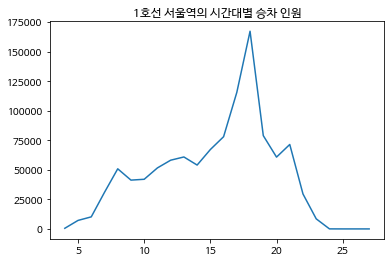

#### 하차인원 추이도 라인플롯에 그려봅니다: plt.plot()

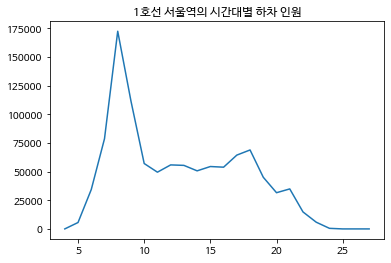

#### 승차인원과 하차인원을 한 플롯에 그려봅니다: plt.plot()

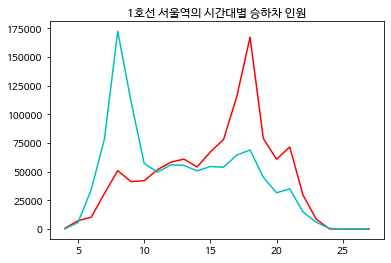